In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification,make_moons
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [16]:
df=pd.read_csv('ushape.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

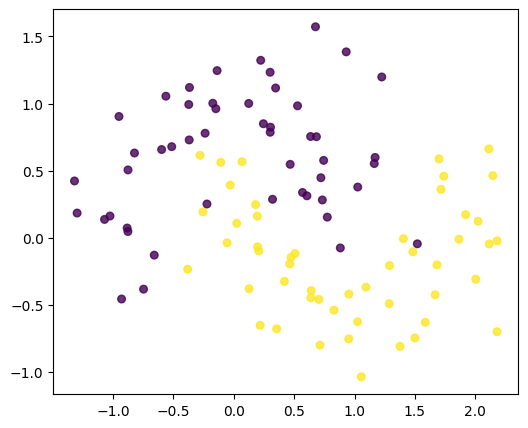

In [18]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y,s=30, alpha=0.8)
plt.show()

# ZERO-INITIALIZATION

### FOR SIGMOID

In [22]:
from tensorflow.keras.layers import Input

model=Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.get_weights()

[array([[-0.17372984,  0.5140762 , -0.51906914,  0.6939792 ,  0.330625  ,
         -0.2261298 ,  0.06865472,  0.49371284,  0.7013008 , -0.6471549 ],
        [ 0.18197238, -0.6425936 ,  0.5009    ,  0.00574362, -0.32065323,
         -0.2650359 , -0.5180372 , -0.62159014,  0.6652878 , -0.08891904]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.55458695],
        [ 0.6080654 ],
        [ 0.47209126],
        [ 0.38226122],
        [ 0.5331505 ],
        [ 0.52962476],
        [-0.22214836],
        [ 0.00439239],
        [ 0.1977148 ],
        [-0.02218866]], dtype=float32),
 array([0.], dtype=float32)]

In [33]:
model.get_weights()[0].shape

(2, 10)

In [34]:
initial_weights=model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

In [35]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

ALL WEIGHTS AND BIASES SET TO 0

In [36]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.4968 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4929 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4710 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5071 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5266 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5344 - loss: 0.6924 - val_accuracy: 0.8500 - val_loss: 0.6927
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6539 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss

In [37]:
model.get_weights()

[array([[-1.0164669, -1.0164669, -1.0164669, -1.0164669, -1.0164669,
         -1.0164669, -1.0164669, -1.0164669, -1.0164669, -1.0164669],
        [ 2.6247168,  2.6247168,  2.6247168,  2.6247168,  2.6247168,
          2.6247168,  2.6247168,  2.6247168,  2.6247168,  2.6247168]],
       dtype=float32),
 array([-0.9882074, -0.9882074, -0.9882074, -0.9882074, -0.9882074,
        -0.9882074, -0.9882074, -0.9882074, -0.9882074, -0.9882074],
       dtype=float32),
 array([[-0.5487405 ],
        [-0.5487405 ],
        [-0.5487405 ],
        [-0.5487405 ],
        [-0.54874057],
        [-0.54874057],
        [-0.54874057],
        [-0.54874057],
        [-0.54874057],
        [-0.54874057]], dtype=float32),
 array([1.7214528], dtype=float32)]

ALL THE WEIGHTS ARE UPDATED EQUALLY FOR A GIVEN INPUT LAYER NODES, MAKING THE MODEL LINEAR

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

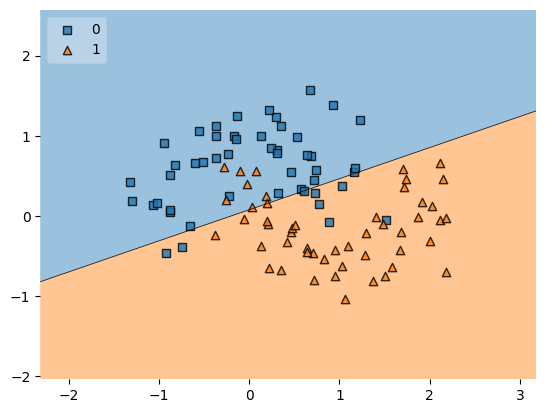

In [39]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

DESPITE ADDING MANY NEURONS IN THE HIDDEN LAYER THE DECISION BOUNDARY IS A STRAIGHT LINE INDICATING THAT THE MODEL IS A LINAER MODEL

### FOR RELU/TANH

In [40]:
model=Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.get_weights()

[array([[ 0.22612357, -0.5398908 , -0.40326408,  0.23067123,  0.10864007,
         -0.33066395,  0.19158375, -0.36479008,  0.24539971,  0.31903797],
        [-0.43806744, -0.43517902,  0.01022315, -0.67769635, -0.11093104,
          0.02580518,  0.68460864, -0.00896144,  0.69062966, -0.5028901 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.20907009],
        [ 0.48589617],
        [-0.05583   ],
        [ 0.1314851 ],
        [-0.3458025 ],
        [-0.5586487 ],
        [-0.26955295],
        [-0.12705874],
        [-0.27594796],
        [ 0.14180535]], dtype=float32),
 array([0.], dtype=float32)]

In [44]:
init_weights=model.get_weights()

init_weights[0]=np.zeros(model.get_weights()[0].shape)
init_weights[1]=np.zeros(model.get_weights()[1].shape)
init_weights[2]=np.zeros(model.get_weights()[2].shape)
init_weights[3]=np.zeros(model.get_weights()[3].shape)

model.set_weights(init_weights)

In [45]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4700 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4993 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5188 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5422 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [48]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.01777782], dtype=float32)]

USING THE ReLU ACTIVATION FUNCTION THE WEIGHTS DID NOT UPDATE AND REMAINED 0

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

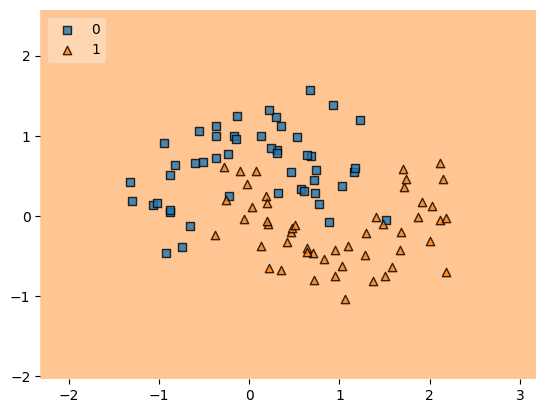

In [47]:
plot_decision_regions(X,y.astype(int),clf=model,legend=2)

HENCE THE MODEL PERFORMED TERRIBLY BAD WITH 50% ACCURACY

# NON-ZERO INITIALIZATION

In [53]:
model=Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
initial_weights=model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

In [55]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.4993 - loss: 1.4784 - val_accuracy: 0.5000 - val_loss: 1.1415
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5071 - loss: 1.4085 - val_accuracy: 0.5000 - val_loss: 1.1329
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5149 - loss: 1.4224 - val_accuracy: 0.5000 - val_loss: 1.1244
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5149 - loss: 1.3896 - val_accuracy: 0.5000 - val_loss: 1.1161
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5266 - loss: 1.2988 - val_accuracy: 0.5000 - val_loss: 1.1079
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5539 - loss: 1.2626 - val_accuracy: 0.5000 - val_loss: 1.0998
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5032 - loss: 1.3510 - val_accuracy: 0.5000 - val_loss: 1.0916
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5461 - loss: 1.2078 - val_accuracy: 0.5000 - val_loss

In [59]:
model.get_weights()

[array([[0.36628947, 0.36628947, 0.36628947, 0.36628947, 0.36628947],
        [0.25697464, 0.25697464, 0.25697464, 0.25697464, 0.25697464]],
       dtype=float32),
 array([0.28532428, 0.28532428, 0.28532428, 0.28532428, 0.28532428],
       dtype=float32),
 array([[0.27725554],
        [0.27725554],
        [0.27725554],
        [0.27725554],
        [0.27725554]], dtype=float32),
 array([0.24576978], dtype=float32)]

AS WE CAN SEE ALL THE WEIGHTS FROM A SINGLE INPUT NODE ARE EQUAL AND THUS THE MODEL TRAINED WOULD BE LINEAR

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

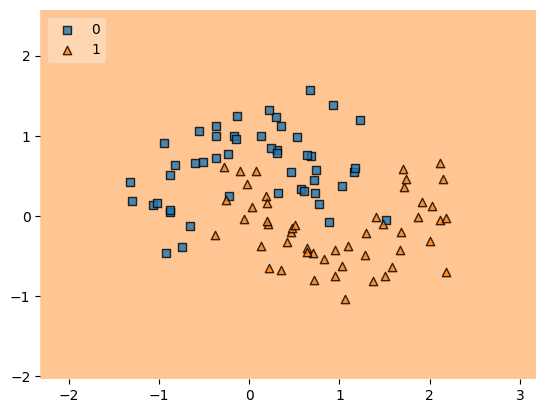

In [58]:
plot_decision_regions(X,y.astype(int),clf=model,legend=2)